In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Multiply, Dropout, BatchNormalization, Activation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestRegressor
from keras.optimizers import Adam
from keras import backend as K
import random
import matplotlib.pyplot as plt

In [2]:
limited_serving_data = pd.read_csv('regression_data/limited_serving_data.csv')
limited_serving_data

Unnamed: 0  SHUTTLECOCK POSITIION IN AIR(X) metres  \
0               0                                4.075543   
1               1                                4.152007   
2               2                                4.228906   
3               3                                4.302100   
4               4                                4.376877   
...           ...                                     ...   
39153       39153                                9.217823   
39154       39154                                9.275177   
39155       39155                                9.326363   
39156       39156                                9.370879   
39157       39157                                9.412822   

       SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                    1.000000   
1                                    1.000000   
2                                    1.000000   
3                                    1.000000   
4                                    1.000000   
...                                       ...   
39153                                5.398111   
39154                                5.413480   
39155                                5.427195   
39156                                5.439123   
39157                                5.450361   

       SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                    1.662912                 1.0   
1                                    1.724866                 2.0   
2                                    1.788139                 3.0   
3                                    1.845245                 4.0   
4                                    1.904128                 5.0   
...                                       ...                 ...   
39153                                2.591053                35.0   
39154                                2.041410                36.0   
39155                                1.463594                37.0   
39156                                0.862842                38.0   
39157                                0.230964                39.0   

       OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                             1                                 4   
1                             1                                 4   
2                             1                                 4   
3                             1                                 4   
4                             1                                 4   
...                         ...                               ...   
39153                       364                                 4   
39154                       364                                 4   
39155                       364                                 4   
39156                       364                                 4   
39157                       364                                 4   

       HUMAN PLAYER POSITION (Y) metres  HUMAN PLAYER POSITION (Z) metres  \
0                                     1                               1.6   
1                                     1                               1.6   
2                                     1                               1.6   
3                                     1                               1.6   
4                                     1                               1.6   
...                                 ...                               ...   
39153                                 4                               2.6   
39154                                 4                               2.6   
39155                                 4                               2.6   
39156                                 4                               2.6   
39157                                 4                               2.6   

       INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                             50  

In [3]:
limited_rallying_data = pd.read_csv('regression_data/limited_rallying_data.csv')
limited_rallying_data

Unnamed: 0  SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                0                                4.076522   
1                1                                4.151082   
2                2                                4.227713   
3                3                                4.303163   
4                4                                4.376557   
...            ...                                     ...   
129679      129679                                9.276323   
129680      129680                                9.326762   
129681      129681                                9.373273   
129682      129682                                9.414002   
129683      129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     0.908805   
1                                     0.819947   
2                                     0.728623   
3                                     0.638705   
4                                     0.551237   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     2.662589                 1.0   
1                                     2.725236                 2.0   
2                                     2.786250                 3.0   
3                                     2.845674                 4.0   
4                                     2.904019                 5.0   
...                                        ...                 ...   
129679                                3.041504                36.0   
129680                                2.466079                37.0   
129681                                1.861569                38.0   
129682                                1.230060                39.0   
129683                                0.572602                40.0   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                            365                                 4   
1                            365                                 4   
2                            365                                 4   
3                            365                                 4   
4                            365                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HUMAN PLAYER POSITION (Z) metres  \
0                                      1                               2.6   
1                                      1                               2.6   
2                                      1                               2.6   
3                                      1                               2.6   
4                                      1                               2.6   
...                                  ...                               ...   
129679                                 4                               2.6   
129680                                 4                               2.6   
129681                                 4                               2.6   
129682                                 4                               2.6   
129683                                 4                               2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (D

In [4]:
# concatemate 2 datasets
combined_df = pd.concat([limited_serving_data, limited_rallying_data], axis=0)
combined_df = combined_df.drop(columns=['Unnamed: 0'])
combined_df

SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                                     4.075543   
1                                     4.152007   
2                                     4.228906   
3                                     4.302100   
4                                     4.376877   
...                                        ...   
129679                                9.276323   
129680                                9.326762   
129681                                9.373273   
129682                                9.414002   
129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     1.000000   
1                                     1.000000   
2                                     1.000000   
3                                     1.000000   
4                                     1.000000   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     1.662912                 1.0   
1                                     1.724866                 2.0   
2                                     1.788139                 3.0   
3                                     1.845245                 4.0   
4                                     1.904128                 5.0   
...                                        ...                 ...   
129679                                3.041504                36.0   
129680                                2.466079                37.0   
129681                                1.861569                38.0   
129682                                1.230060                39.0   
129683                                0.572602                40.0   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                              1                                 4   
1                              1                                 4   
2                              1                                 4   
3                              1                                 4   
4                              1                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HUMAN PLAYER POSITION (Z) metres  \
0                                      1                               1.6   
1                                      1                               1.6   
2                                      1                               1.6   
3                                      1                               1.6   
4                                      1                               1.6   
...                                  ...                               ...   
129679                                 4                               2.6   
129680                                 4                               2.6   
129681                                 4                               2.6   
129682                                 4                               2.6   
129683                                 4                               2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                              50   
1                                              50   
2                           

In [5]:
combined_df.rename(columns={'HUMAN PLAYER POSITION (Z) metres': 'HEIGHT OF SHOT(m)'}, inplace=True)
combined_df

SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                                     4.075543   
1                                     4.152007   
2                                     4.228906   
3                                     4.302100   
4                                     4.376877   
...                                        ...   
129679                                9.276323   
129680                                9.326762   
129681                                9.373273   
129682                                9.414002   
129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     1.000000   
1                                     1.000000   
2                                     1.000000   
3                                     1.000000   
4                                     1.000000   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     1.662912                 1.0   
1                                     1.724866                 2.0   
2                                     1.788139                 3.0   
3                                     1.845245                 4.0   
4                                     1.904128                 5.0   
...                                        ...                 ...   
129679                                3.041504                36.0   
129680                                2.466079                37.0   
129681                                1.861569                38.0   
129682                                1.230060                39.0   
129683                                0.572602                40.0   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                              1                                 4   
1                              1                                 4   
2                              1                                 4   
3                              1                                 4   
4                              1                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HEIGHT OF SHOT(m)  \
0                                      1                1.6   
1                                      1                1.6   
2                                      1                1.6   
3                                      1                1.6   
4                                      1                1.6   
...                                  ...                ...   
129679                                 4                2.6   
129680                                 4                2.6   
129681                                 4                2.6   
129682                                 4                2.6   
129683                                 4                2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                              50   
1                                              50   
2                                              50   
3                                              50   
4                                              50   
...                                           ...

In [6]:
combined_df["OBSERVATION NUMBER"] = combined_df["OBSERVATION NUMBER"].astype(int)
combined_df

SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                                     4.075543   
1                                     4.152007   
2                                     4.228906   
3                                     4.302100   
4                                     4.376877   
...                                        ...   
129679                                9.276323   
129680                                9.326762   
129681                                9.373273   
129682                                9.414002   
129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     1.000000   
1                                     1.000000   
2                                     1.000000   
3                                     1.000000   
4                                     1.000000   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     1.662912                   1   
1                                     1.724866                   2   
2                                     1.788139                   3   
3                                     1.845245                   4   
4                                     1.904128                   5   
...                                        ...                 ...   
129679                                3.041504                  36   
129680                                2.466079                  37   
129681                                1.861569                  38   
129682                                1.230060                  39   
129683                                0.572602                  40   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                              1                                 4   
1                              1                                 4   
2                              1                                 4   
3                              1                                 4   
4                              1                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HEIGHT OF SHOT(m)  \
0                                      1                1.6   
1                                      1                1.6   
2                                      1                1.6   
3                                      1                1.6   
4                                      1                1.6   
...                                  ...                ...   
129679                                 4                2.6   
129680                                 4                2.6   
129681                                 4                2.6   
129682                                 4                2.6   
129683                                 4                2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                              50   
1                                              50   
2                                              50   
3                                              50   
4                                              50   
...                                           ...

In [7]:
# Create a copy of the combined_df
# Create a copy of the combined_df

# Create a copy of the combined_df

# Group the data by 'OBSERVATION GROUP NUMBER'
grouped_data = combined_df.groupby('OBSERVATION GROUP NUMBER')

# Create a new column 'TIME SERIES(s)' with initial values of -1
combined_df['TIME SERIES(s)'] = -1

# Assign time series values for each group
for group, group_data in grouped_data:
    # Calculate the time series values for the current group
    time_series = [0.1 * i for i in range(len(group_data))]
    
    # Create a mask to select the rows of the current group
    mask = combined_df['OBSERVATION GROUP NUMBER'] == group
    
    # Update the 'TIME SERIES(s)' column of the current group using the mask
    combined_df.loc[mask, 'TIME SERIES(s)'] = time_series

# Print the modified DataFrame
combined_df

SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                                     4.075543   
1                                     4.152007   
2                                     4.228906   
3                                     4.302100   
4                                     4.376877   
...                                        ...   
129679                                9.276323   
129680                                9.326762   
129681                                9.373273   
129682                                9.414002   
129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     1.000000   
1                                     1.000000   
2                                     1.000000   
3                                     1.000000   
4                                     1.000000   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     1.662912                   1   
1                                     1.724866                   2   
2                                     1.788139                   3   
3                                     1.845245                   4   
4                                     1.904128                   5   
...                                        ...                 ...   
129679                                3.041504                  36   
129680                                2.466079                  37   
129681                                1.861569                  38   
129682                                1.230060                  39   
129683                                0.572602                  40   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                              1                                 4   
1                              1                                 4   
2                              1                                 4   
3                              1                                 4   
4                              1                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HEIGHT OF SHOT(m)  \
0                                      1                1.6   
1                                      1                1.6   
2                                      1                1.6   
3                                      1                1.6   
4                                      1                1.6   
...                                  ...                ...   
129679                                 4                2.6   
129680                                 4                2.6   
129681                                 4                2.6   
129682                                 4                2.6   
129683                                 4                2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                              50   
1                                              50   
2                                              50   
3                                              50   
4                                              50   
...                                           ...

In [8]:


# Convert degrees to radians for the specified columns
combined_df['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)'] = np.deg2rad(combined_df['INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)'])
combined_df['INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'] = np.deg2rad(combined_df['INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'])

combined_df

SHUTTLECOCK POSITIION IN AIR(X) metres  \
0                                     4.075543   
1                                     4.152007   
2                                     4.228906   
3                                     4.302100   
4                                     4.376877   
...                                        ...   
129679                                9.276323   
129680                                9.326762   
129681                                9.373273   
129682                                9.414002   
129683                                9.447133   

        SHUTTLECOCK POSITIION IN AIR(Y) metres  \
0                                     1.000000   
1                                     1.000000   
2                                     1.000000   
3                                     1.000000   
4                                     1.000000   
...                                        ...   
129679                               10.288077   
129680                               10.348188   
129681                               10.403617   
129682                               10.452156   
129683                               10.491641   

        SHUTTLECOCK POSITIION IN AIR(Z) metres  OBSERVATION NUMBER  \
0                                     1.662912                   1   
1                                     1.724866                   2   
2                                     1.788139                   3   
3                                     1.845245                   4   
4                                     1.904128                   5   
...                                        ...                 ...   
129679                                3.041504                  36   
129680                                2.466079                  37   
129681                                1.861569                  38   
129682                                1.230060                  39   
129683                                0.572602                  40   

        OBSERVATION GROUP NUMBER  HUMAN PLAYER POSITION (X) metres  \
0                              1                                 4   
1                              1                                 4   
2                              1                                 4   
3                              1                                 4   
4                              1                                 4   
...                          ...                               ...   
129679                      1576                                 4   
129680                      1576                                 4   
129681                      1576                                 4   
129682                      1576                                 4   
129683                      1576                                 4   

        HUMAN PLAYER POSITION (Y) metres  HEIGHT OF SHOT(m)  \
0                                      1                1.6   
1                                      1                1.6   
2                                      1                1.6   
3                                      1                1.6   
4                                      1                1.6   
...                                  ...                ...   
129679                                 4                2.6   
129680                                 4                2.6   
129681                                 4                2.6   
129682                                 4                2.6   
129683                                 4                2.6   

        INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  \
0                                        0.872665   
1                                        0.872665   
2                                        0.872665   
3                                        0.872665   
4                                        0.872665   
...                                           ...

In [9]:
random.seed(42)
# Get the unique subsets of shots in your dataset
unique_subsets = combined_df['OBSERVATION GROUP NUMBER'].unique() # list of [1 to 1576]

# Shuffle the order of subsets randomly
random.shuffle(unique_subsets)

# Determine the number of subsets for training and testing
# num_train_subsets = int(0.8 * len(unique_subsets))  # 80% for training, adjust as needed
# print(num_train_subsets)


num_train_subsets = int(0.9 * len(unique_subsets))  # 90% for training, adjust as needed
print(num_train_subsets)


train_subsets = unique_subsets[:num_train_subsets]
test_subsets = unique_subsets[num_train_subsets:]
print("Length of train_subsets: ", len(train_subsets))
print("Length of test_subsets: ", len(test_subsets))

# Filter the dataset based on the assigned subsets
train_data = combined_df[combined_df['OBSERVATION GROUP NUMBER'].isin(train_subsets)]
test_data = combined_df[combined_df['OBSERVATION GROUP NUMBER'].isin(test_subsets)]

print("The shape of train_data: ",train_data.shape)
print("The Length of train_data: ",len(train_data))
print("The shape of test_data: ",test_data.shape)
print("The Length of test_data: ",len(test_data))


1418
Length of train_subsets:  1418
Length of test_subsets:  158
The shape of train_data:  (152955, 12)
The Length of train_data:  152955
The shape of test_data:  (15887, 12)
The Length of test_data:  15887


In [10]:
# After randomly separating the training dataset and testing dataset,
# there is a need to seprate each datasets into input feature X and ouput feature Y

# Split the X and Y features for training and testing
X_train = train_data[['HUMAN PLAYER POSITION (X) metres', 
                   'HUMAN PLAYER POSITION (Y) metres', 
                    'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                    'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                    'INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                    'TIME SERIES(s)',
                    'HEIGHT OF SHOT(m)']]

Y_train = train_data[['SHUTTLECOCK POSITIION IN AIR(X) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

X_test = test_data[['HUMAN PLAYER POSITION (X) metres', 
                   'HUMAN PLAYER POSITION (Y) metres', 
                    'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                    'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                    'INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                    'TIME SERIES(s)',
                    'HEIGHT OF SHOT(m)']]

Y_test = test_data[['SHUTTLECOCK POSITIION IN AIR(X) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Z) metres']]


In [11]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of Y_train is: ", Y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of Y_test is: ", Y_test.shape)

The shape of X_train is:  (152955, 7)
The shape of Y_train is:  (152955, 3)
The shape of X_test is:  (15887, 7)
The shape of Y_test is:  (15887, 3)


In [12]:
X_train_array = X_train.values
X_test_array = X_test.values


print("Shape of X_train_array: ", X_train_array.shape)
print("Shape of X_test_array: ", X_test_array.shape)


Y_train_array = Y_train.values
Y_test_array = Y_test.values

Shape of X_train_array:  (152955, 7)
Shape of X_test_array:  (15887, 7)


In [13]:
# Use the RandomForestRegressor to find the importance of each features

# Create a Random Forest regressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train_array, Y_train_array)

# Get the feature importances
importances = rf_model.feature_importances_

# Print the feature importances
for feature, importance in zip(X_train.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: HUMAN PLAYER POSITION (X) metres, Importance: 0.0
Feature: HUMAN PLAYER POSITION (Y) metres, Importance: 0.11246028007608501
Feature: INITITAL VELOCITY OF SHUTTELCOCK(m/s), Importance: 0.027822808019152115
Feature: INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE), Importance: 0.10780422605457654
Feature: INITIAL SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE), Importance: 0.3336933587963856
Feature: TIME SERIES(s), Importance: 0.40686360745497335
Feature: HEIGHT OF SHOT(m), Importance: 0.011355719598827465


In [14]:
def build_model(hp):
    model = Sequential()
    
    #Input Layer with  minimum 16 - 256 units that can take in input X shape of (flexible sample, 7)
    # By default activation functin = tanh
    model.add(LSTM(units=hp.Int('units', min_value=16, max_value=256, step=32), 
                   input_shape=(None, num_features),
                   return_sequences=True))  # Add return_sequences=True to retain the sequence output
    
    # By default activation functin = tanh (capture non-linear pattern)
    model.add(LSTM(units=hp.Int('units_2', min_value=16, max_value=256, step=32)))  # Add an additional LSTM layer
    
    # Output layer which captures linear pattern and outputs a array of 3 features
    model.add(Dense(units=3))
    model.add(Activation('linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# Reshape the input data to match the LSTM model input shape
num_samples, num_features = X_train_array.shape
X_train_weighted = X_train_array * importances
X_train_weighted_reshaped = X_train_weighted.reshape(num_samples, -1, num_features)

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='tuner_dir_limited_approach',
    project_name='lstm_hyperparameter_tuning'
)

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter tuning with early stopping
tuner.search(X_train_weighted_reshaped, Y_train_array, epochs=15, validation_split=0.1, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Multiply the feature importance weights with the test data
X_test_weighted = X_test_array * importances

# Reshape the weighted test data
num_samples_test, _ = X_test_weighted.shape
X_test_weighted_reshaped = X_test_weighted.reshape(num_samples_test, -1, num_features)

# Predict the shuttlecock trajectory
y_pred = best_model.predict(X_test_weighted_reshaped)

# Calculate the evaluation metrics
mae = mean_absolute_error(Y_test_array, y_pred)
mse = mean_squared_error(Y_test_array, y_pred)
rmse = np.sqrt(mse)

print("The mean_absolute_error: ", mae)
print("The mean_squared_error: ", mse)
print("The root_mean_squared_error: ", rmse)

print("The Summary of the best model: ",best_model.summary())


Trial 5 Complete [00h 03m 32s]
val_loss: 1.0256965160369873

Best val_loss So Far: 1.0256965160369873
Total elapsed time: 00h 11m 56s
INFO:tensorflow:Oracle triggered exit
497/497 [==============================] - 1s 998us/step
The mean_absolute_error:  0.12499599551570757
The mean_squared_error:  0.13218787034335955
The root_mean_squared_error:  0.3635764986125472
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 240)         238080    
                                                                 
 lstm_1 (LSTM)               (None, 16)                16448     
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
 activation (Activation)     (None, 3)                 0         
                 

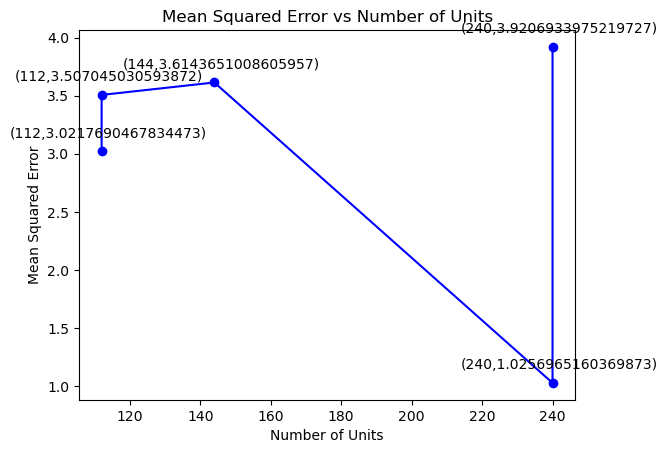

In [15]:
# Extract the hyperparameters and MSEs for each trial
hyperparameters = []
mses = []

for trial in tuner.oracle.get_best_trials(num_trials=5):
    hyperparameters.append(trial.hyperparameters.values)
    mses.append(trial.score)

# Extract the number of units from the hyperparameters
num_units = [hp['units'] for hp in hyperparameters]

# Sort the data based on the num_units
sorted_data = sorted(zip(num_units, mses))

# Extract the sorted num_units and mses
sorted_num_units, sorted_mses = zip(*sorted_data)

# Plot the MSE versus the number of units
plt.plot(sorted_num_units, sorted_mses, 'bo-')
plt.xlabel('Number of Units')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of Units')

# Add coordinate annotations
for i, (x, y) in enumerate(zip(sorted_num_units, sorted_mses)):
    plt.annotate(f'({x},{y})', (x, y), textcoords="offset points", xytext=(5, 10), ha='center')

plt.show()

In [16]:
import plotly.graph_objects as go

# Create the 3D scatter plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=Y_test_array[:, 0],  # X-coordinate of the true values
        y=Y_test_array[:, 1],  # Y-coordinate of the true values
        z=Y_test_array[:, 2],  # Z-coordinate of the true values
        mode='markers',
        name='True Values',
        marker=dict(color='blue', size=2),
        opacity=0.7
    ),
    go.Scatter3d(
        x=y_pred[:, 0],  # X-coordinate of the predicted values
        y=y_pred[:, 1],  # Y-coordinate of the predicted values
        z=y_pred[:, 2],  # Z-coordinate of the predicted values
        mode='markers',
        name='Predicted Values',
        marker=dict(color='red', size=2),
        opacity=0.7
    )
])

# Set plot title anz`d axis labels
fig.update_layout(
    title='True Values vs Predicted Values',
    scene=dict(
        xaxis_title='X-coordinate',
        yaxis_title='Y-coordinate',
        zaxis_title='Z-coordinate'
    )
)

# Show the 3D plot
fig.show()
